ZHDB_0205_6_20.txt
ZHDB_0205_6_20.txt
ZHDB_0205_6_20.txt


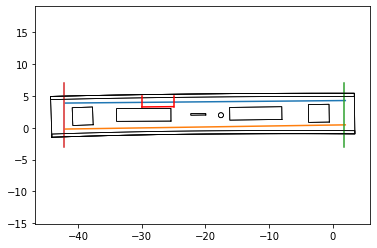

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math

In [2]:
def getDistance(x1, x2, y1, y2):
    result = math.sqrt((x2 -x1)**2 + (y2 - y1)**2)
    return(result)

In [3]:
keep_distance = []
average_number_of_persons = []
filenames = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):    
    if "txt" in filename and "geo" not in filename:
        filenames.append(filename)
        df = get_whole_df(filename, 5, 5)
        selectID = df
        average_persons = get_average_person_number(filename, df["frame_x"].unique())
        print(average_persons)
        average_number_of_persons.append(average_persons)
        #Alle Abstände berechnen die in Fläche liegen
        borderDistance = []
        selectIDBorder = selectID.loc[selectID["inBorder"] == True]
        for gruppe in selectIDBorder["GroupID"].unique():
            selectGroup = selectIDBorder.loc[selectIDBorder["GroupID"] == gruppe, ["id", "frame_x", "x/m", "y/m_x"]]
            for frame in selectGroup["frame_x"].unique():
                selectFrame = selectGroup.loc[selectGroup["frame_x"] == frame]
                #plt.scatter(selectFrame["x/m"], selectFrame["y/m_x"])
                #plotBahnsteig()
                for contact in itertools.combinations(selectFrame["id"], 2):
                    firstPosition = selectFrame.loc[selectFrame["id"] == contact[0], ["x/m", "y/m_x"]]
                    secondPosition = selectFrame.loc[selectFrame["id"] == contact[1], ["x/m", "y/m_x"]]
                    distanz = getDistance(x1 = float(firstPosition["x/m"]), x2 = float(secondPosition["x/m"]), y1 = float(firstPosition["y/m_x"]), y2 = float(secondPosition["y/m_x"]))
                    borderDistance.append(distanz)
#         print("Abstände innerhalb der Fläche:")
#         print(statistics.mean(borderDistance))
#         distance_in_area.append(statistics.mean(borderDistance))
        
        #Anzahl an Verletzungen des Mindestabstands
        verletzungen = len([i for i in borderDistance if i < 1.5]) / len(borderDistance)
        eingehalten = len([i for i in borderDistance if i > 1.5]) / len(borderDistance)
#         print("In " + str(eingehalten) + "% der Begegnungen innerhalb der Fläche wurde Mindestabstand eingehalten")
#         print("In " + str(verletzungen) + "% der Begegnungen innerhalb der Fläche wurde Mindestabstand nicht eingehalten")
        keep_distance.append(eingehalten)
#         print(average_number_of_persons)
    

ZHDB_0205_6_20.txt
ZHDB_0205_6_20.txt
ZHDB_0205_6_20.txt
47.84562012142238
ZHDB_0212_6_20.txt
ZHDB_0212_6_20.txt
ZHDB_0212_6_20.txt
36.9746835443038
ZHDB_0219_6_20.txt
ZHDB_0219_6_20.txt
ZHDB_0219_6_20.txt
37.51740357478833
ZHDB_0226_6_20.txt
ZHDB_0226_6_20.txt
ZHDB_0226_6_20.txt
44.12252042007001
ZHDB_0304_6_20.txt
ZHDB_0304_6_20.txt
ZHDB_0304_6_20.txt
35.784520668425685
ZHDB_0311_6_20.txt
ZHDB_0311_6_20.txt
ZHDB_0311_6_20.txt
40.38690476190476
ZHDB_0318_6_20.txt
ZHDB_0318_6_20.txt
ZHDB_0318_6_20.txt
49.33868613138686
ZHDB_0325_6_20.txt
ZHDB_0325_6_20.txt
ZHDB_0325_6_20.txt
49.73809523809524
ZHDB_0401_6_20.txt
ZHDB_0401_6_20.txt
ZHDB_0401_6_20.txt
56.36363636363637
ZHDB_0408_6_20.txt
ZHDB_0408_6_20.txt
ZHDB_0408_6_20.txt
62.60587002096436
ZHDB_0415_6_20.txt
ZHDB_0415_6_20.txt
ZHDB_0415_6_20.txt
38.479274611398964
ZHDB_0422_6_20.txt
ZHDB_0422_6_20.txt
ZHDB_0422_6_20.txt
39.688235294117646
ZHDB_0429_6_20.txt
ZHDB_0429_6_20.txt
ZHDB_0429_6_20.txt
51.98638426626324
ZHDB_0506_6_20.txt
ZHDB

In [4]:
keep_distance

[0.5068646679742225,
 0.48661654135338345,
 0.4995496847793455,
 0.5080872011251758,
 0.4847260792729109,
 0.5107084019769358,
 0.5033500837520938,
 0.5316205533596838,
 0.5665322580645161,
 0.52989449003517,
 0.5714285714285714,
 0.5137614678899083,
 0.5804597701149425,
 0.521982414068745,
 0.5759577278731837,
 0.5277246653919694,
 0.5426395939086295,
 0.5275446917183509,
 0.5217751970136872,
 0.5050761421319797,
 0.5548819400127633,
 0.5084082909659757,
 0.509440684004275,
 0.5254931149981392,
 0.4849047840222945,
 0.5345755693581781,
 0.5132102786825914,
 0.5098241985522234,
 0.5217527386541471,
 0.5294488188976378]

In [5]:
keep_distance_two_rolling = pd.Series(keep_distance).rolling(2).mean()
keep_distance_three_rolling = pd.Series(keep_distance).rolling(3).mean()
keep_distance_expanding = pd.Series(keep_distance).expanding().mean()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

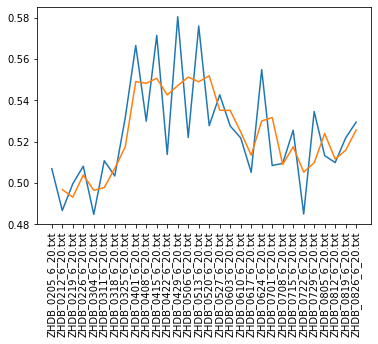

In [8]:
import matplotlib.pyplot as plt
plt.plot(filenames, keep_distance)
plt.plot(filenames, keep_distance_two_rolling)
plt.xticks(rotation = "vertical")
plt.savefig("Relatives Abstandseinhalten mit gleitendem Durchschnitt")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

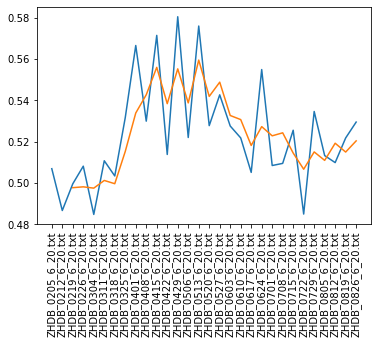

In [9]:
plt.plot(filenames, keep_distance)
plt.plot(filenames, keep_distance_three_rolling)
plt.xticks(rotation = "vertical")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

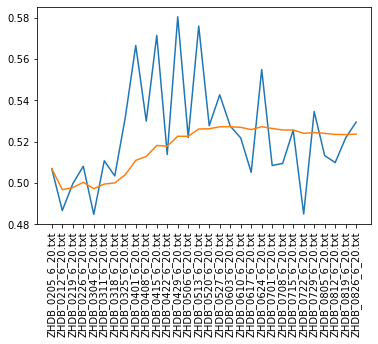

In [10]:
plt.plot(filenames, keep_distance)
plt.plot(filenames, keep_distance_expanding)
plt.xticks(rotation = "vertical")